In [1]:
import mlrequest
from importlib import reload
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
mlrequest = reload(mlrequest)

In [5]:
response = mlrequest.busca('I5 8400', condition='used')

In [6]:
response['paging']

{'total': 134, 'primary_results': 34, 'offset': 0, 'limit': 50}

In [7]:
results = response['results']

In [8]:
item = results[0]

In [9]:
item

{'id': 'MLB2125332938',
 'site_id': 'MLB',
 'title': 'Processador Intel Core I5-9500 Melhor Q 9400 8500 8400',
 'seller': {'id': 336517535,
  'permalink': 'http://perfil.mercadolivre.com.br/MARHELP',
  'registration_date': '2018-07-13T19:29:59.000-04:00',
  'car_dealer': False,
  'real_estate_agency': False,
  'tags': ['normal',
   'credits_priority_1',
   'credits_profile',
   'mshops',
   'messages_as_seller'],
  'seller_reputation': {'power_seller_status': None,
   'level_id': '5_green',
   'metrics': {'cancellations': {'period': '365 days', 'rate': 0, 'value': 0},
    'claims': {'period': '365 days', 'rate': 0.015, 'value': 3},
    'delayed_handling_time': {'period': '365 days', 'rate': 0, 'value': 0},
    'sales': {'period': '365 days', 'completed': 183}},
   'transactions': {'canceled': 16,
    'period': 'historic',
    'total': 199,
    'ratings': {'negative': 0, 'neutral': 0, 'positive': 1},
    'completed': 183}}},
 'price': 1199,
 'prices': {'id': 'MLB2125332938',
  'prices':

In [10]:
def remove_items(item):
    item.pop('seller', None)
    item.pop('prices', None)
    item.pop('installments', None)
    item.pop('address', None)
    item.pop('shipping', None)
    item.pop('seller_address', None)
    item.pop('attributes', None) # Should use
    item.pop('tags', None) # Should use
    return item

In [11]:
new_list = list(map(remove_items, results))

In [12]:
new_list[0]

{'id': 'MLB2125332938',
 'site_id': 'MLB',
 'title': 'Processador Intel Core I5-9500 Melhor Q 9400 8500 8400',
 'price': 1199,
 'sale_price': None,
 'currency_id': 'BRL',
 'available_quantity': 1,
 'sold_quantity': 5,
 'buying_mode': 'buy_it_now',
 'listing_type_id': 'gold_special',
 'stop_time': '2041-12-22T04:00:00.000Z',
 'condition': 'used',
 'permalink': 'https://produto.mercadolivre.com.br/MLB-2125332938-processador-intel-core-i5-9500-melhor-q-9400-8500-8400-_JM',
 'thumbnail': 'http://http2.mlstatic.com/D_964755-MLB47956523143_102021-I.jpg',
 'thumbnail_id': '964755-MLB47956523143_102021',
 'accepts_mercadopago': True,
 'original_price': None,
 'category_id': 'MLB1693',
 'official_store_id': None,
 'domain_id': 'MLB-COMPUTER_PROCESSORS',
 'catalog_product_id': 'MLB15280430',
 'tags': ['standard_price_by_channel',
  'dragged_bids_and_visits',
  'poor_quality_picture',
  'immediate_payment',
  'cart_eligible',
  'shipping_guaranteed'],
 'order_backend': 1,
 'use_thumbnail_id': Tru

In [13]:
df = pd.DataFrame(new_list)

In [25]:
df

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,catalog_product_id,tags,order_backend,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin,differential_pricing
0,MLB2125332938,MLB,Processador Intel Core I5-9500 Melhor Q 9400 8...,1199.00,None,BRL,1,5,buy_it_now,gold_special,...,MLB15280430,"[standard_price_by_channel, dragged_bids_and_v...",1,True,None,None,None,None,None,NaN
1,MLB1345132368,MLB,"Core I5 8400 Lga 1151 2,8 A 4ghz Coffee Lake O...",1250.00,None,BRL,1,5,buy_it_now,gold_special,...,MLB8847471,"[dragged_bids_and_visits, poor_quality_picture...",2,True,None,None,None,None,None,NaN
2,MLB2182322969,MLB,Processador I5 8400 Oitava Geração 2.8 Ghz(usado),1199.00,None,BRL,1,0,buy_it_now,gold_special,...,MLB9256901,"[poor_quality_picture, immediate_payment, cart...",3,True,None,None,None,None,None,NaN
3,MLB1605847777,MLB,Dell Optiplex Mini 3060 I5 8400t 16g Ssd 256m2...,3580.00,None,BRL,1,1,buy_it_now,gold_pro,...,None,"[good_quality_picture, standard_price_by_chann...",4,True,None,None,None,None,None,{'id': 35713368}
4,MLB1983324318,MLB,Dell Optiplex Mini 3060 I5 8400t 16g Ssd 128m2...,3300.00,None,BRL,1,2,buy_it_now,gold_pro,...,None,"[dragged_bids_and_visits, good_quality_picture...",5,True,None,None,None,None,None,{'id': 35713368}
5,MLB2166558762,MLB,Computador Cpu Dell I5 - 8400 8gb Ssd240gb Ent...,2530.00,None,BRL,1,0,buy_it_now,gold_pro,...,None,"[good_quality_picture, immediate_payment, cart...",6,True,None,None,None,None,None,{'id': 35713368}
6,MLB1945627034,MLB,Hp Desktop Pro G2 Mini Torre Core I5 8400 8gb ...,2750.00,None,BRL,1,0,buy_it_now,gold_pro,...,None,"[good_quality_picture, immediate_payment, cart...",7,True,None,None,None,None,None,{'id': 35713368}
7,MLB2187834677,MLB,Desktop Hp Pro G2 - I5 8400 Hd 1tb 8gb Ddr4,2745.00,None,BRL,1,0,buy_it_now,gold_pro,...,None,"[good_quality_picture, immediate_payment, cart...",8,True,None,None,None,None,None,{'id': 35713368}
8,MLB2186918444,MLB,Desktop Dell Optiplex 3060 I5-8400 Ddr4 Ram 8g...,3450.00,None,BRL,1,0,buy_it_now,gold_pro,...,None,"[good_quality_picture, immediate_payment, cart...",9,True,None,None,None,None,None,{'id': 35713368}
9,MLB2161967099,MLB,Kit I5 8400 Oitava Geração 8 Giga Placa Mãe Co...,1899.00,None,BRL,1,0,buy_it_now,gold_special,...,None,"[incomplete_technical_specs, poor_quality_pict...",10,True,None,None,None,None,None,NaN


In [14]:
df[df['price'] > 5000]

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,catalog_product_id,tags,order_backend,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin,differential_pricing
16,MLB2136353603,MLB,Pc Gamer I5-8400 Mem. 16gb Gtx 1060 Ssd 500gb ...,6000.0,None,BRL,1,0,buy_it_now,gold_pro,...,None,"[poor_quality_picture, immediate_payment, cart...",17,True,None,None,None,None,None,{'id': 35713368}


<AxesSubplot:>

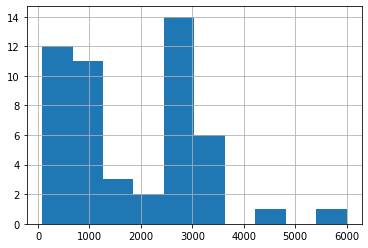

In [15]:
df['price'].hist()

In [16]:
df_gpu = df[df['domain_id'] == 'MLB-COMPUTER_PROCESSORS']

In [17]:
df_gpu['price'].describe()

count      17.000000
mean      651.568824
std       462.012806
min        79.900000
25%       329.490000
50%       400.000000
75%      1199.000000
max      1375.000000
Name: price, dtype: float64

## Tentando remover outliers

In [18]:
df_gpu['price'].describe()

count      17.000000
mean      651.568824
std       462.012806
min        79.900000
25%       329.490000
50%       400.000000
75%      1199.000000
max      1375.000000
Name: price, dtype: float64

In [21]:
mean = df_gpu['price'].mean()
std = df_gpu['price'].std()
min_value = mean - std
max_value = mean + std
df_without_outliers = df_gpu[((df_gpu['price'] >= min_value) & (df_gpu['price'] <= max_value))]

In [22]:
df_without_outliers

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,catalog_product_id,tags,order_backend,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin,differential_pricing
29,MLB2178317501,MLB,Processador Gamer Intel Core I5-8400 De 6 Núcl...,1000.00,None,BRL,1,0,buy_it_now,free,...,MLB15038150,"[poor_quality_picture, immediate_payment, cart...",30,True,None,None,None,None,None,{'id': 33426180}
34,MLB2147216887,MLB,Cpu Intel Core I5-3330 3.00ghz (3.20ghz) Lga 1...,329.49,None,BRL,50,25,buy_it_now,gold_pro,...,MLB10227855,"[poor_quality_picture, immediate_payment, cart...",35,True,None,None,None,None,None,{'id': 35713366}
36,MLB2112930453,MLB,Processador Core I5 3470 Lga 1155 3.2 Ghz 6m,330.00,None,BRL,1,5,buy_it_now,gold_special,...,None,"[dragged_bids_and_visits, good_quality_picture...",37,True,None,None,None,None,None,NaN
37,MLB1227723985,MLB,"Processador Core I5 3470 Lga 1155 3,20ghz 6m",398.70,None,BRL,50,5,buy_it_now,gold_pro,...,None,"[incomplete_technical_specs, poor_quality_pict...",38,True,None,None,None,None,None,{'id': 35713366}
41,MLB1926090359,MLB,Processador Core I5 - 2400 - (6m De Cache Até ...,285.00,None,BRL,1,5,buy_it_now,gold_special,...,None,"[good_quality_picture, immediate_payment, cart...",42,True,None,None,None,None,None,NaN
43,MLB2089977573,MLB,"Processador Core I5 3470 Lga 1155 3,20ghz 6m F...",435.60,None,BRL,50,2,buy_it_now,gold_pro,...,None,"[incomplete_technical_specs, poor_quality_pict...",44,True,None,None,None,None,None,{'id': 35713366}
44,MLB2140560490,MLB,Processador Gamer Intel Core I5-4570,400.00,None,BRL,1,5,buy_it_now,gold_special,...,MLB15116368,"[good_quality_picture, immediate_payment, cart...",45,True,None,None,None,None,None,NaN
47,MLB1779421697,MLB,Processador Intel Core I5-4570 De 4 Núcleos E ...,689.00,None,BRL,1,3,buy_it_now,gold_pro,...,MLB9046758,"[poor_quality_picture, immediate_payment, cart...",48,True,None,None,None,None,None,{'id': 35713366}
49,MLB2186805896,MLB,Processador Intel® Core I5-4590s Socket Fclga1150,389.00,None,BRL,1,1,buy_it_now,gold_pro,...,MLB8901850,"[immediate_payment, cart_eligible]",50,True,None,None,None,None,None,{'id': 35713366}


In [23]:
df_without_outliers['price'].describe()

count       9.000000
mean      472.976667
std       229.149887
min       285.000000
25%       330.000000
50%       398.700000
75%       435.600000
max      1000.000000
Name: price, dtype: float64

<AxesSubplot:>

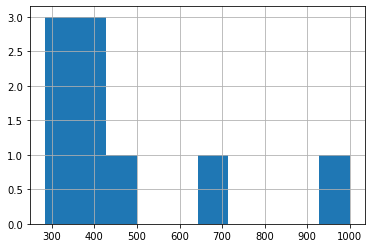

In [24]:
df_without_outliers['price'].hist()

In [178]:
df_without_outliers['price'].mean()

3536.25

In [143]:
2365 - 413

1952

In [144]:
df[df['price'] > 10000]['permalink'].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [168]:
d = pd.DataFrame(columns=['product', 'model', 'average', 'std'])

In [175]:
d = d.append({
    'product': 1,
    'model': 2
}, ignore_index=True)

In [177]:
d.T

,0
product,1.0
model,2.0
average,NaN
std,NaN
